In [63]:
from pathlib import Path
import re

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [5]:
results = Path("/home/ara/roomba_ws/results/")

In [40]:
distances = []
environment = []

for trial in results.iterdir():
    meta = trial.name.split("_")
    vel = re.findall(r'\d+', meta[2])[0]
    if len(vel) == 1:
        vel += '0'

    for test in trial.iterdir():
        # Get the cumulative distance for each test
        with open(test, 'rb') as f:
            odom = np.load(f)
            prev_odom = np.roll(odom, 1, axis=0)
            dx = np.linalg.norm(odom[:,:2] - prev_odom[:,:2], axis=1)[1:]
            dist = dx.cumsum()
            # save
            distances.append([dist[-1], int(vel)/100])
            if len(meta) == 4:
                environment.append('Hallway')
            else:
                environment.append('Carpet')

In [41]:
distances = np.array(distances, dtype=np.float)

In [42]:
mask = distances[:,1] != .50
mask = np.logical_and(mask, distances[:,0] > 0.9)
distances = distances[mask]

In [54]:
mu = distances[:,0].mean()
sigma = distances[:,0].std()

Text(0, 0.5, 'Percent Probability')

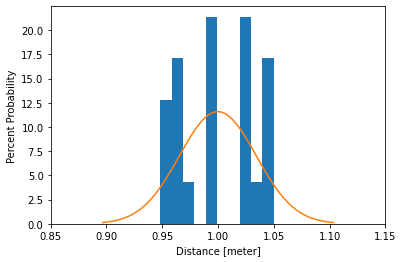

In [74]:
result = plt.hist(distances[:,0], density=True)
plt.xlim((.85, 1.15))
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
dx = result[1][1] - result[1][0]
scale = len(distances)*dx
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel('Distance [meter]')
plt.ylabel('Percent Probability')

In [76]:
print(distances.shape)
print(mu, sigma)

(23, 2)
0.9998886653208778 0.034416554881450706


In [114]:
data = []
for fn in results.iterdir():
    with open(fn, 'rb') as f:
        arr = np.load(f)
        data.append(arr)

In [120]:
i = 4
odom = data[i]
n = odom.shape[0]-1
dt = 0.1
t = np.linspace(0, dt * n, num=n)

prev_odom = np.roll(odom, 1, axis=0)
dx = np.linalg.norm(odom[:,:2] - prev_odom[:,:2], axis=1)[1:]
dist = dx.cumsum()
dx /= dt

vel = odom[1:,2]
dv = (odom[:,2] - prev_odom[:,2])[1:]

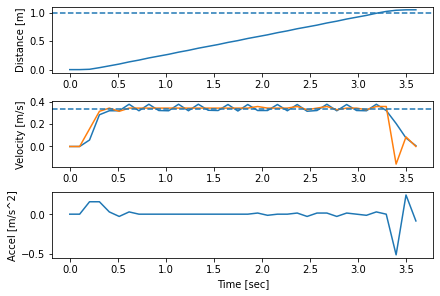

In [121]:

fig, axs = plt.subplots(3, 1, constrained_layout=True)
axs[-1].set_xlabel("Time [sec]")

axs[0].plot(t, dist, label="Position")
axs[0].set_ylabel("Distance [m]")
axs[0].axhline(1, ls="dashed")

axs[1].plot(t, dx)
axs[1].plot(t, vel)
axs[1].set_ylabel("Velocity [m/s]")
axs[1].axhline(.33, ls="dashed")


axs[2].plot(t, dv)
axs[2].set_ylabel("Accel [m/s^2]")
# axs[1].plot(odom[:,2], label="x Vel")
# axs[2].plot(odom[:,3], label="y vel")

plt.show()

In [123]:
dist

array([0.        , 0.        , 0.00577964, 0.03400926, 0.06579491,
       0.09758252, 0.13514876, 0.16693542, 0.20450215, 0.23651107,
       0.26829628, 0.30586252, 0.3376487 , 0.37521543, 0.40744612,
       0.43945399, 0.47679604, 0.50836025, 0.5457023 , 0.57771025,
       0.60971868, 0.64706121, 0.67884776, 0.71619259, 0.74753536,
       0.77954298, 0.81710806, 0.84889627, 0.88624016, 0.91824779,
       0.95003453, 0.98760064, 1.01961068, 1.04006176, 1.04761979,
       1.04828644])

In [ ]:
for odom in data:
    prev_odom = np.roll(odom, 1, axis=0)
    dx = np.linalg.norm(odom[:,:2] - prev_odom[:,:2], axis=1)[1:]
    